# 📊 Resumen General del Proyecto - Análisis Completo

Este notebook presenta un resumen ejecutivo de todos los pipelines del proyecto, combinando los resultados de Data Processing, Clustering, Clasificación y Regresión.


In [3]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kedro.framework.startup import bootstrap_project
from kedro.framework.session import KedroSession

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


In [4]:
project_path = Path.cwd().parent
bootstrap_project(project_path)
session = KedroSession.create(project_path=project_path)
catalog = session.load_context().catalog

# Cargar todos los reportes
analisis_dp = catalog.load('analisis_pipeline_data_processing')
analisis_cl = catalog.load('analisis_pipeline_clustering')
analisis_clf = catalog.load('analisis_pipeline_clasificacion')
analisis_reg = catalog.load('analisis_pipeline_regresion')

print("✅ Todos los reportes cargados exitosamente")


[11/27/25 02:52:53] INFO     Loading data from analisis_pipeline_data_processing               data_catalog.py:1046
                             (PickleDataset)...                                                                    

                    INFO     Loading data from analisis_pipeline_clustering (PickleDataset)... data_catalog.py:1046

                    INFO     Loading data from analisis_pipeline_clasificacion                 data_catalog.py:1046
                             (PickleDataset)...                                                                    

                    INFO     Loading data from analisis_pipeline_regresion (PickleDataset)...  data_catalog.py:1046

✅ Todos los reportes cargados exitosamente


## 1. Resumen Ejecutivo del Proyecto


In [5]:
print("=" * 80)
print("📊 RESUMEN EJECUTIVO DEL PROYECTO")
print("=" * 80)

print(f"\n📥 DATOS ORIGINALES:")
print(f"  - Filas: {analisis_dp['resumen_general']['filas_originales']:,}")
print(f"  - Columnas: {analisis_dp['resumen_general']['columnas_originales']}")

print(f"\n📤 DATOS PROCESADOS:")
print(f"  - Filas finales: {analisis_dp['resumen_general']['filas_finales']:,}")
print(f"  - Reducción: {analisis_dp['resumen_general']['porcentaje_reduccion']:.2f}%")
print(f"  - Features creadas: {analisis_dp['resumen_general']['features_creadas']}")

print(f"\n🔬 PIPELINES EJECUTADOS:")
print(f"  1. ✅ Data Processing - {len(analisis_dp['etapas'])} etapas")
print(f"  2. ✅ Clustering - {analisis_cl['resumen_general']['algoritmos_evaluados']} algoritmos")
print(f"  3. ✅ Clasificación - {len(analisis_clf['resumen_general']['modelos_evaluados'])} modelos")
print(f"  4. ✅ Regresión - {len(analisis_reg['resumen_general']['modelos_evaluados'])} modelos")


📊 RESUMEN EJECUTIVO DEL PROYECTO

📥 DATOS ORIGINALES:
  - Filas: 80,508
  - Columnas: 6

📤 DATOS PROCESADOS:
  - Filas finales: 70,820
  - Reducción: 12.03%
  - Features creadas: 4

🔬 PIPELINES EJECUTADOS:
  1. ✅ Data Processing - 6 etapas
  2. ✅ Clustering - 4 algoritmos
  3. ✅ Clasificación - 5 modelos
  4. ✅ Regresión - 5 modelos


## 2. Mejores Modelos por Pipeline


🏆 MEJORES MODELOS POR PIPELINE

🔍 CLUSTERING:
  - Mejor Silhouette: Agglomerative (0.3236)
  - Mejor Davies-Bouldin: DBSCAN (0.8989)

🎯 CLASIFICACIÓN:
  - Mejor modelo: GradientBoosting
  - Accuracy: 0.9906
  - F1 Score: 0.9903

📈 REGRESIÓN:
  - Mejor modelo: GradientBoosting
  - R²: 0.9915 (99.15% varianza explicada)
  - RMSE: 0.5884


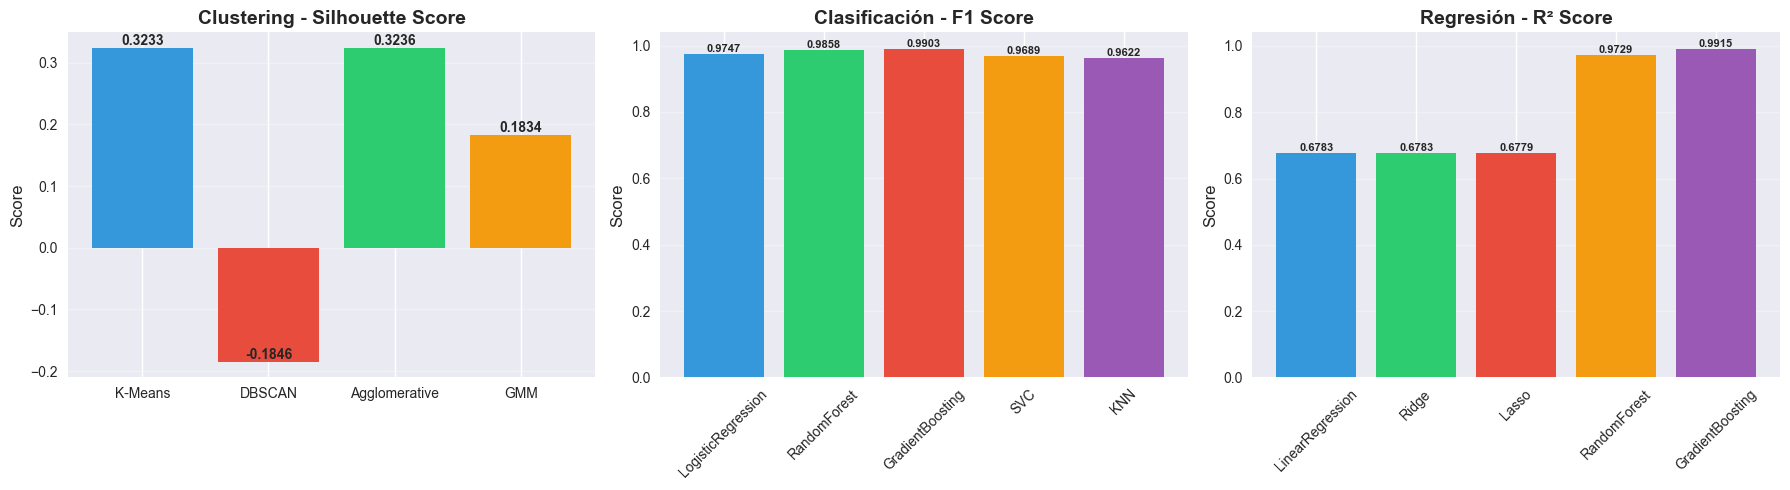

In [6]:
print("=" * 80)
print("🏆 MEJORES MODELOS POR PIPELINE")
print("=" * 80)

print(f"\n🔍 CLUSTERING:")
print(f"  - Mejor Silhouette: {analisis_cl['comparacion_algoritmos']['mejor_silhouette']['algoritmo']} ({analisis_cl['comparacion_algoritmos']['mejor_silhouette']['score']:.4f})")
print(f"  - Mejor Davies-Bouldin: {analisis_cl['comparacion_algoritmos']['mejor_davies_bouldin']['algoritmo']} ({analisis_cl['comparacion_algoritmos']['mejor_davies_bouldin']['score']:.4f})")

print(f"\n🎯 CLASIFICACIÓN:")
print(f"  - Mejor modelo: {analisis_clf['comparacion_modelos']['mejor_f1']['modelo']}")
print(f"  - Accuracy: {analisis_clf['comparacion_modelos']['mejor_accuracy']['score']:.4f}")
print(f"  - F1 Score: {analisis_clf['comparacion_modelos']['mejor_f1']['score']:.4f}")

print(f"\n📈 REGRESIÓN:")
print(f"  - Mejor modelo: {analisis_reg['comparacion_modelos']['mejor_r2']['modelo']}")
print(f"  - R²: {analisis_reg['comparacion_modelos']['mejor_r2']['score']:.4f} ({analisis_reg['comparacion_modelos']['mejor_r2']['score']*100:.2f}% varianza explicada)")
print(f"  - RMSE: {analisis_reg['comparacion_modelos']['mejor_rmse']['score']:.4f}")

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Clustering - Silhouette Scores
algoritmos_cl = ['K-Means', 'DBSCAN', 'Agglomerative', 'GMM']
silhouette_scores = []
for algo_key in ['kmeans', 'dbscan', 'agglomerative', 'gmm']:
    score = analisis_cl['algoritmos'][algo_key]['metricas']['silhouette_score']
    silhouette_scores.append(score if score else 0)

axes[0].bar(algoritmos_cl, silhouette_scores, color=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12'])
axes[0].set_title('Clustering - Silhouette Score', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(silhouette_scores):
    axes[0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Clasificación - F1 Scores
modelos_clf = list(analisis_clf['modelos'].keys())
f1_scores = [analisis_clf['modelos'][m]['metricas']['f1'] for m in modelos_clf]
axes[1].bar(modelos_clf, f1_scores, color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6'])
axes[1].set_title('Clasificación - F1 Score', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(f1_scores):
    axes[1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Regresión - R² Scores
modelos_reg = list(analisis_reg['modelos'].keys())
r2_scores = [analisis_reg['modelos'][m]['metricas']['r2'] for m in modelos_reg]
axes[2].bar(modelos_reg, r2_scores, color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6'])
axes[2].set_title('Regresión - R² Score', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Score', fontsize=12)
axes[2].grid(axis='y', alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(r2_scores):
    axes[2].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()


In [7]:
print("=" * 80)
print("📊 ESTADÍSTICAS DE DATOS POR PIPELINE")
print("=" * 80)

# Crear tabla comparativa
datos_comparacion = {
    'Pipeline': ['Data Processing', 'Clustering', 'Clasificación', 'Regresión'],
    'Muestras': [
        analisis_dp['resumen_general']['filas_finales'],
        analisis_cl['resumen_general']['muestras_totales'],
        analisis_clf['resumen_general']['total_muestras'],
        analisis_reg['resumen_general']['total_muestras']
    ],
    'Features': [
        analisis_dp['resumen_general']['columnas_finales'],
        analisis_cl['resumen_general']['features_utilizadas'],
        analisis_clf['resumen_general']['total_features'],
        analisis_reg['resumen_general']['total_features']
    ],
    'Train/Test': [
        'N/A',
        'N/A',
        analisis_clf['resumen_general']['proporcion_train_test'],
        analisis_reg['resumen_general']['proporcion_train_test']
    ]
}

df_comparacion = pd.DataFrame(datos_comparacion)
print("\n")
print(df_comparacion.to_string(index=False))


📊 ESTADÍSTICAS DE DATOS POR PIPELINE


       Pipeline  Muestras  Features              Train/Test
Data Processing     70820        10                     N/A
     Clustering     10000         6                     N/A
  Clasificación      7954         7 6363/1591 (80.0%/20.0%)
      Regresión      7954         7 6363/1591 (80.0%/20.0%)


## 4. Conclusiones y Recomendaciones Generales


In [8]:
print("=" * 80)
print("💡 CONCLUSIONES Y RECOMENDACIONES GENERALES")
print("=" * 80)

print(f"\n📊 DATA PROCESSING:")
resumen_dp = analisis_dp.get('resumen_general', {})
print(f"  - Se procesaron {resumen_dp.get('filas_originales', 0):,} filas originales")
print(f"  - Se redujeron a {resumen_dp.get('filas_finales', 0):,} filas ({resumen_dp.get('porcentaje_reduccion', 0):.2f}% de reducción)")
print(f"  - Se crearon {resumen_dp.get('features_creadas', 0)} features nuevas")

print(f"\n🔍 CLUSTERING:")
recom_cl = analisis_cl.get('recomendaciones', {})
algoritmos_cl = analisis_cl.get('algoritmos', {})
if 'mejor_algoritmo_general' in recom_cl:
    print(f"  - Mejor algoritmo: {recom_cl['mejor_algoritmo_general']}")
if algoritmos_cl:
    nombres = [a.get('nombre', 'N/A') for a in algoritmos_cl.values() if isinstance(a, dict)]
    if nombres:
        print(f"  - Algoritmos evaluados: {', '.join(nombres)}")

print(f"\n🎯 CLASIFICACIÓN:")
recom_clf = analisis_clf.get('recomendaciones', {})
comparacion_clf = analisis_clf.get('comparacion_modelos', {})
if 'mejor_modelo_general' in recom_clf:
    print(f"  - Mejor modelo: {recom_clf['mejor_modelo_general']}")
if comparacion_clf and 'mejor_accuracy' in comparacion_clf:
    acc_score = comparacion_clf['mejor_accuracy'].get('score', 0)
    print(f"  - Accuracy: {acc_score*100:.2f}%")
    if acc_score > 0.96:
        print(f"  - Todos los modelos superan 96% de accuracy")

print(f"\n📈 REGRESIÓN:")
recom_reg = analisis_reg.get('recomendaciones', {})
comparacion_reg = analisis_reg.get('comparacion_modelos', {})
if 'mejor_modelo_general' in recom_reg:
    print(f"  - Mejor modelo: {recom_reg['mejor_modelo_general']}")
if comparacion_reg:
    if 'mejor_r2' in comparacion_reg:
        r2_score = comparacion_reg['mejor_r2'].get('score', 0)
        print(f"  - R²: {r2_score*100:.2f}% de varianza explicada")
    if 'mejor_rmse' in comparacion_reg:
        rmse_score = comparacion_reg['mejor_rmse'].get('score', 0)
        print(f"  - RMSE: {rmse_score:.4f} unidades")

print(f"\n🎯 RECOMENDACIONES FINALES:")
if 'mejor_modelo_general' in recom_clf:
    print(f"  1. Para clasificación: Usar {recom_clf['mejor_modelo_general']}")
if 'mejor_modelo_general' in recom_reg:
    print(f"  2. Para regresión: Usar {recom_reg['mejor_modelo_general']}")
if 'mejor_algoritmo_general' in recom_cl:
    print(f"  3. Para clustering: {recom_cl['mejor_algoritmo_general']}")
print(f"  4. Los modelos de ensemble (GradientBoosting, RandomForest) muestran mejor rendimiento")

print("\n" + "=" * 80)
print("✅ Resumen General Completado")
print("=" * 80)


💡 CONCLUSIONES Y RECOMENDACIONES GENERALES

📊 DATA PROCESSING:
  - Se procesaron 80,508 filas originales
  - Se redujeron a 70,820 filas (12.03% de reducción)
  - Se crearon 4 features nuevas

🔍 CLUSTERING:
  - Mejor algoritmo: K-Means o Agglomerative (Silhouette ~0.32)
  - Algoritmos evaluados: K-Means, DBSCAN, Agglomerative Clustering, Gaussian Mixture Model

🎯 CLASIFICACIÓN:
  - Mejor modelo: GradientBoosting
  - Accuracy: 99.06%
  - Todos los modelos superan 96% de accuracy

📈 REGRESIÓN:
  - Mejor modelo: GradientBoosting
  - R²: 99.15% de varianza explicada
  - RMSE: 0.5884 unidades

🎯 RECOMENDACIONES FINALES:
  1. Para clasificación: Usar GradientBoosting
  2. Para regresión: Usar GradientBoosting
  3. Para clustering: K-Means o Agglomerative (Silhouette ~0.32)
  4. Los modelos de ensemble (GradientBoosting, RandomForest) muestran mejor rendimiento

✅ Resumen General Completado


In [ ]:
session.close()
print("✅ Sesión de Kedro cerrada")
